# Linear Fit

In [1]:
import numpy as np
from smpl import plot
from smpl import io
from smpl import fit
from smpl import functions as f
import uncertainties.unumpy as unp
import uncertainties as unc

In [2]:

data = np.loadtxt(io.find_file('test_linear_data.txt',3))
xdata = data[:,0]
xerr = data[:,2]
ydata = data[:,1]
yerr = data[:,3]
x = unp.uarray(xdata,xerr)
y = unp.uarray(ydata,yerr)

In [3]:
data

array([[0. , 1. , 0.1, 0.2],
       [1. , 2. , 0.2, 0.1],
       [2. , 3. , 0.3, 0.1],
       [3. , 5. , 0.1, 0.4],
       [4. , 5. , 0.1, 0.1],
       [5. , 6. , 0.1, 0.2]])

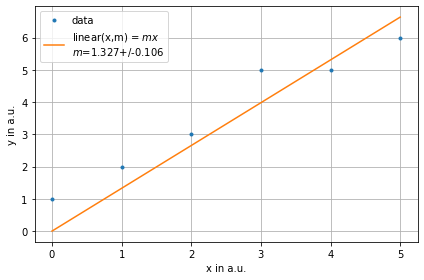

In [4]:
ff = plot.fit(xdata, ydata, fmt='.', label='data', xaxis="x in a.u.",yaxis="y in a.u.",function=f.linear, params=[1])

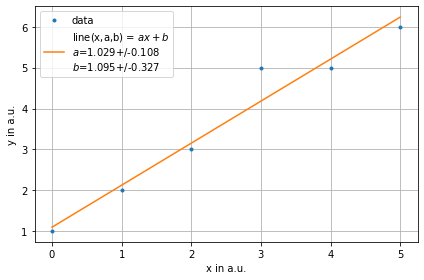

In [5]:
ff = plot.fit(xdata, ydata, fmt='.', label='data', xaxis="x in a.u.",yaxis="y in a.u.",function=f.line, params=[1,2])

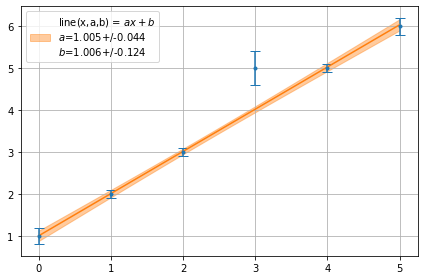

In [6]:
ff = plot.fit(xdata, y, fmt='.', function=f.line, params=[1,1], sigmas=1,lpos=2)

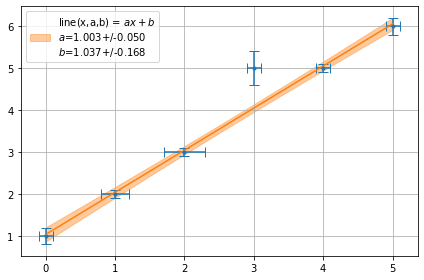

In [7]:
ff = plot.fit(x, y, fmt='.', function=f.line, params=[1,1], sigmas=1,lpos=2)

1.120553495053+/-0.000000000005
-0.000+/-0.004


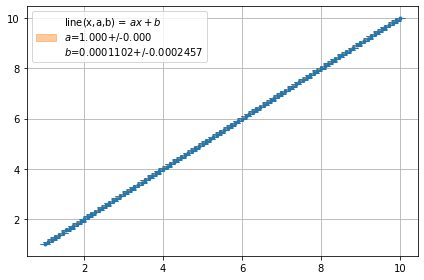

In [8]:
from smpl import stat

x = np.linspace(1,10,100)
y = unp.uarray(stat.noisy(x,std=0.001), np.random.normal(0.01, 0.001, len(x)))
ff = plot.fit(x, y, fmt='.', function=f.line, params=[1,1], sigmas=1,lpos=2)
print(fit.Chi2(x,y,f.line,ff))
print(fit.R2(x,y,f.line,ff))

1.63298761616874+/-0.00000000000013
(-0+/-8)e-14


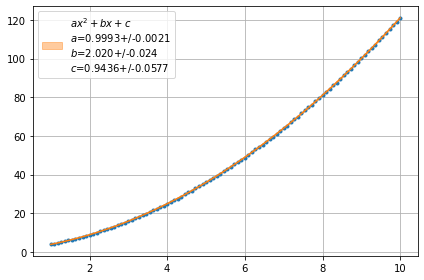

In [17]:
x = np.linspace(1,10,100)
y = stat.noisy(x,mean=1,std=0.01)**2
def f(x,a,b,c): 
    return a*x**2+b*x+c
ff = plot.fit(x, y, fmt='.', function=f,  sigmas=1,lpos=2)
print(fit.Chi2(x,y,f,ff))
print(fit.R2(x,y,f,ff))